In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import string
import os
import textwrap
import requests

### `Step-1:` Creating Substitution Cipher

In [2]:
letters1 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters2 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'ñ', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [3]:
# initializing an empty dictionary
true_mapping = {}

In [4]:
# shuffle second set of letters
random.shuffle(letters2)

In [5]:
# populate map
for k, v in zip(letters1, letters2):
    true_mapping[k] = v

In [6]:
# true_mapping

### `Step-2:` Creating the Language Model

In [7]:
# # Downloading the file
# if not os.path.exists('moby_dick.txt'):
#     print('Downloading Moby dick...')
#     r = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
#     with open('moby_dick.txt','w') as f:
#         f.write(r.content.decode())

In [8]:
# initialize Markov Matrix to store all the bigram probabilities
M = np.ones((27,27))
# also we need a vector to store the unigram probabilities
# initial state distribution
pi = np.zeros(27)
# print('Markov Matrix:', M)
# print(type(M))
# print('Initial State Distribution:', pi)
# print(len(pi))
# function to update the Markov Matrix
def update_transition(ch1,ch2):
#     i = (ord(ch1) + 97)%97
    i = ord(ch1) -97
    j = ord(ch2) -97
#     j = (ord(ch2) + 97)%97
    if i == 144:
        i = 26
        M[i,j] += 1
    elif j==144:
        j = 26
        M[i,j] += 1
    else:
        M[i,j] += 1

# function to update the initial state distribution
def update_pi(ch):
#     i = (ord(ch) + 97)%97
    i = ord(ch) -97
    if i == 144:
        i = 26
        pi[i] += 1
    else:
        pi[i] += 1    
    
# get the log-probability of a token/word
def get_word_prob(word):
#     i = (ord(word[0])+97)%97
    i = ord(word[0]) -97
    if i == 144:
        i = 26
        logp = np.log(pi[i],where = pi[i] >0)
    else:
        logp = np.log(pi[i],where = pi[i] >0)
    
    for ch in word[1:]:
#         j = (ord(ch) + 97)%97
        j = ord(ch) -97
        if j==144:
            j=26
            logp += np.log(M[i,j]) #update prob
        else:
            logp += np.log(M[i,j])
        i = j # update j
    return logp

# get the probability of a sequence of words
def get_sequence_prob(words):
    # if input is a string, split into an array of tokens
    if type(words) == str:
        words = words.split()
    logp = 0
    for word in words:
        logp += get_word_prob(word)
    return logp

### `Step-3:` Training the Language Model 

In [9]:
# Creating a markov model based on an english dataset
# DATA PRE-PROCESSING
regex = re.compile('[^a-zA-Z]')

#load in words
for line in open('Espanol.txt'):
    line = line.rstrip()
    # there aare blank lines in the file
    if line:
        line = regex.sub(' ',line) # replace all non-alpha characters with space
        
        # split the tokens in the line and lowercase
        tokens = line.lower().split()
#         print(tokens)
#         tokens = nltk.word_tokenize(tokens)
        
        for token in tokens:
            # update the model
            # first letter
            ch0 = token[0]
#             print(ch0)
            update_pi(ch0)
            
            # other letters
            for ch1 in token[1:]:
                update_transition(ch0,ch1)
                ch0 = ch1
# normalize the probabilities
pi /= pi.sum()
print("Initial State Distribution:",pi)
M /= M.sum(axis=1,keepdims=True)
print('Markov Matrix:', M)

Initial State Distribution: [0.07959893 0.01451531 0.0768117  0.08951712 0.11822196 0.01556505
 0.01075074 0.03131108 0.01172808 0.00582784 0.00032578 0.09024108
 0.05585318 0.04350974 0.02555564 0.0718164  0.04097589 0.0195468
 0.07054948 0.03956418 0.02070513 0.03058713 0.00043437 0.00065156
 0.03250561 0.0033302  0.        ]
Markov Matrix: [[2.35932523e-04 7.11336558e-02 5.23770202e-02 9.99174236e-02
  7.19594196e-03 7.19594196e-03 1.30942550e-02 3.42102159e-03
  4.01085290e-03 1.40379851e-02 1.17966262e-04 1.20679486e-01
  5.80394007e-02 1.57249027e-01 1.41559514e-03 2.07620621e-02
  5.42644804e-03 1.29762888e-01 1.50642916e-01 3.62156423e-02
  5.19051551e-03 1.16786599e-02 1.17966262e-04 4.71865047e-04
  2.05261295e-02 8.96543589e-03 1.17966262e-04]
 [2.76569298e-01 6.21504040e-04 6.21504040e-04 6.21504040e-04
  9.19825979e-02 6.21504040e-04 6.21504040e-04 6.21504040e-04
  1.17464264e-01 3.10752020e-03 6.21504040e-04 9.57116221e-02
  6.21504040e-04 6.21504040e-04 7.20944686e-02 6.

In [10]:
# original_message =''' Hace calor en la sala de clase y un discípulo abre la ventana. Él abre
# también la puerta. Ahora hace demasiado frío y otro discípulo cierra la
# ventana y la puerta. Él escribe con la pluma o con el lápiz lo que dicta
# el maestro. Él va a la pizarra y escribe con la tiza en la pizarra.
# Después la limpia y va a su banco, se sienta y copia lo que está escrito
# en la pizarra. '''

In [11]:
original_message = ''' Google Translate es un servicio de traducción automática neuronal multilingüe desarrollado por Google para traducir texto, documentos y sitios web de un idioma a otro. Ofrece una interfaz de sitio web, una aplicación móvil para Android e iOS y una API que ayuda a los desarrolladores a crear extensiones de navegador y aplicaciones de software. '''

In [12]:
# a function to encode a message
def encode_message(msg):
    #downcase
    msg = msg.lower()
    
    # replace non-alpha characters
    msg = regex.sub(' ',msg)
    
    # make the encoded message
    coded_msg = []
    for ch in msg:
        coded_ch = ch
        if ch in true_mapping:
            coded_ch = true_mapping[ch]
        coded_msg.append(coded_ch)
    return ''.join(coded_msg)
encoded_message = encode_message(original_message)

# a function to decode a message
def decode_message(msg, word_map):
    decoded_msg = []
    for ch in msg:
        decoded_ch = ch
        if ch in word_map:
            decoded_ch = word_map[ch]
        decoded_msg.append(decoded_ch)
    return ''.join(decoded_msg)

In [13]:
# run an evolutionary algorithm to decode the message

# initialization point
dna_pool = []
for _ in range(20):
    dna = list(letters1)
    random.shuffle(dna)
    dna_pool.append(dna)
# print('DNA-POOL',dna_pool)

In [14]:
def evolve_offspring(dna_pool, n_children):
    # make n_children per offspring
    offspring = []
    for dna in dna_pool:
        for _ in range(n_children):
            copy = dna.copy()
            j = np.random.randint(len(copy))
            k = np.random.randint(len(copy))
            
            # switch
            tmp = copy[j]
            copy[j] = copy[k]
            copy[k] = tmp
            offspring.append(copy)
    return offspring + dna_pool

In [15]:
num_iters = 1000
scores = np.zeros(num_iters)
best_dna = None
best_map = None
best_score = float('-inf')
for i in range(num_iters):
    if i>0:
        # get offspring from the current dna pool
        dna_pool = evolve_offspring(dna_pool,3)
        
        # calculate core for each dna
        dna2score ={}
        for dna in dna_pool:
            current_map = {}
            for k, v in zip(letters1,dna):
                current_map[k] = v
            
            decoded_message = decode_message(encoded_message, current_map)
            score = get_sequence_prob(decoded_message)
            
            #store it
            # needs to be a strin to be a dict key
            dna2score[''.join(dna)] = score
            
            # record te best so far
            if score > best_score:
                best_dna = dna
                best_map = current_map
                best_score = score
            # avg score 
        scores[i] = np.mean(list(dna2score.values()))
            # keep 5 best dna
            # also turn tem back into list of sinle chars
        sorted_dna = sorted(dna2score.items(), key =lambda x:x[1],reverse = True)
        dna_pool = [list(k) for k, v in sorted_dna[:5]]
            
        if i % 200 == 0:
            print('iter:',i,'score:',scores[i],'best so far:',best_score)
# print('sorted_dna: \n', sorted_dna)
# print('\n dna_pool: \n', dna_pool)

iter: 200 score: -771.1818141974177 best so far: -718.9461646559292
iter: 400 score: -790.836516604383 best so far: -714.5878555883312
iter: 600 score: -792.1447480105968 best so far: -714.5878555883312
iter: 800 score: -781.8707346873831 best so far: -714.5878555883312


In [16]:
print(best_map)

{'a': 'e', 'b': 'i', 'c': 'x', 'd': 'y', 'e': 'n', 'f': 'z', 'g': 'g', 'h': 'p', 'i': 'r', 'j': 'a', 'k': 'j', 'l': 'u', 'm': 's', 'n': 'w', 'ñ': 'h', 'o': 'b', 'p': 'c', 'q': 'l', 'r': 't', 's': 'm', 't': 'v', 'u': 'd', 'v': 'q', 'w': 'o', 'x': 'f', 'y': 'ñ', 'z': 'k'}


In [17]:
# use best score
decoded_message = decode_message(encoded_message, best_map)
print('LL of decoded message:',get_sequence_prob(decoded_message))
print('LL of True message:',get_sequence_prob(regex.sub(' ',original_message.lower())))

# which letters are wrong
for true, v in true_mapping.items():
    pred = best_map[v]
    if true != pred:
        print('true: %s, pred: %s'%(true,pred))

LL of decoded message: -714.5878555883312
LL of True message: -743.0342662845735
true: b, pred: z
true: f, pred: b
true: h, pred: f
true: j, pred: k
true: k, pred: w
true: ñ, pred: j
true: w, pred: h
true: y, pred: ñ
true: z, pred: y


In [18]:
generated_txt = textwrap.fill(decoded_message)
print('True message:\n', textwrap.fill(original_message))
print('\n Encoded Message:\n',encoded_message)
print('\n Decoded message:\n',textwrap.fill(decoded_message))

True message:
  Google Translate es un servicio de traducción automática neuronal
multilingüe desarrollado por Google para traducir texto, documentos y
sitios web de un idioma a otro. Ofrece una interfaz de sitio web, una
aplicación móvil para Android e iOS y una API que ayuda a los
desarrolladores a crear extensiones de navegador y aplicaciones de
software.

 Encoded Message:
  gwwgqa rijemqjra am le maitbpbw ua rijulppb e jlrws rbpj ealiwejq slqrbqbeg a uamjiiwqqjuw hwi gwwgqa hjij rijulpbi racrw  uwplsaerwm y mbrbwm ñaf ua le bubwsj j wriw  woiapa lej beraiojd ua mbrbw ñaf  lej jhqbpjpb e s tbq hjij jeuiwbu a bwm y lej jhb vla jyluj j qwm uamjiiwqqjuwiam j piaji acraembweam ua ejtagjuwi y jhqbpjpbweam ua mworñjia  

 Decoded message:
  google translate es un servicio de traducci n autom tica neuronal
multiling e desarrollado por google para traducir texto  documentos ñ
sitios hez de un idioma a otro  obrece una interbay de sitio hez  una
aplicaci n m vil para android e ios ñ una api

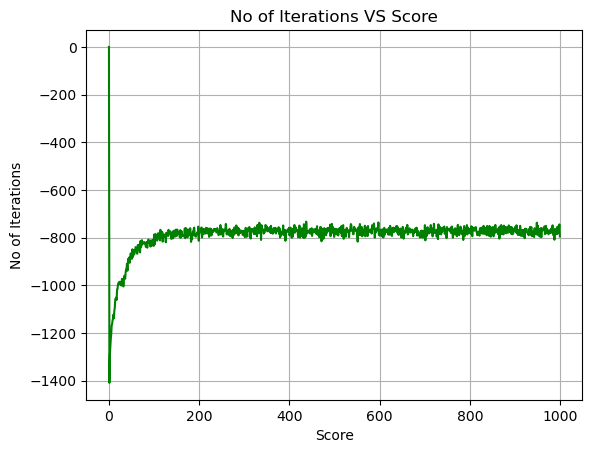

In [19]:
plt.plot(scores,'g')
plt.xlabel('Score') 
plt.ylabel('No of Iterations') 
plt.title('No of Iterations VS Score')
plt.grid()
plt.show()

In [20]:
from nltk.translate.bleu_score import sentence_bleu
score = sentence_bleu([original_message], generated_txt)
print(score)

0.7857928780855103
